In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import pickle

In [37]:
import colors

In [32]:
import seaborn
seaborn.set_style('white')
seaborn.set_context("paper", font_scale=2)

In [43]:
explorations = pandas.read_csv('/home/mteruel/edm/results/dkt_lstm/by_problem_id/classifier_explorations.tsv', sep='\t')
explorations = explorations.replace({'norm-fixed': 'norm'})
explorations[:3]

,Experiment,Classifier,Distance,MaxSteps,LSTMUnits,Dropout,BatchSize,EmbeddingSize,Pretrained,Finetuned,AUC,RMSE,Accuracy,R2,OverfittingScore
0,19-05-19-22-39,LSTM,None,300,50,0.3,30,None,No,NaN,0.693,0.457,0.682,0.077,NaN
1,19-05-20-02-25,LSTM,None,30,30,0.3,50,None,No,NaN,0.715,0.449,0.696,0.092,NaN
2,19-05-20-04-14,LSTM,None,50,30,0.1,50,None,No,NaN,0.719,0.448,0.698,0.103,NaN


In [44]:
explorations['ModelType'] = explorations[['Classifier', 'Distance']].apply(
    lambda x: x[0] + ('-' + x[1].split('-')[-1] if x[1] != 'None' else ''), axis=1)

(0.6, 0.8)

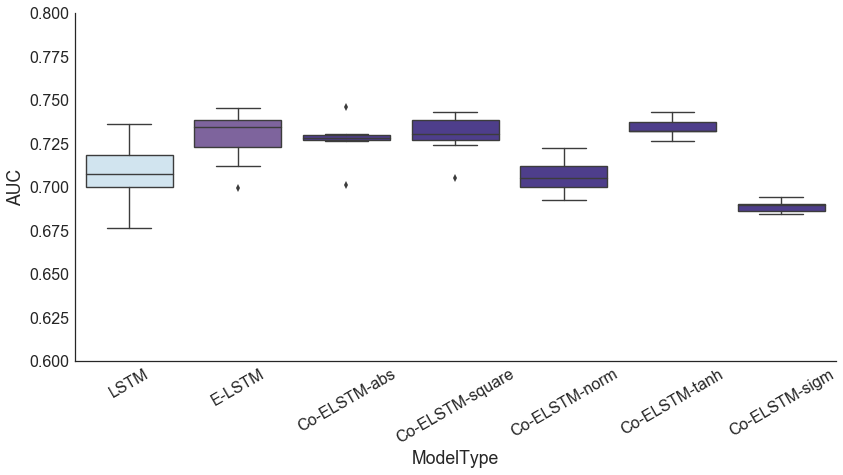

In [62]:
my_pal = {mtype: colors.dark_blue for mtype in explorations.ModelType.unique()}
my_pal['LSTM'] = colors.light_blue
my_pal['E-LSTM'] = colors.purple
g = seaborn.factorplot(
    data=explorations[explorations.Pretrained == 'No'], x='ModelType', y='AUC', kind='box', # hue='Pretrained',
    palette=my_pal,
    size=6, aspect=2)
g.set_xticklabels(rotation=30)
plt.ylim((0.6, 0.8))

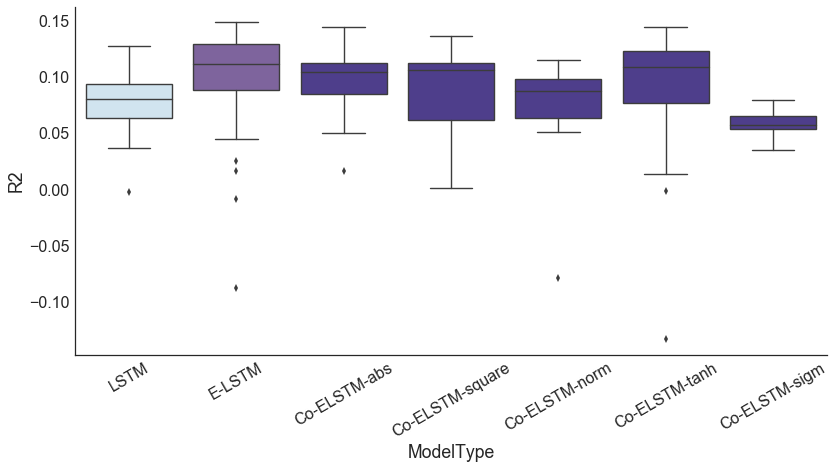

In [60]:
my_pal = {mtype: colors.dark_blue for mtype in explorations.ModelType.unique()}
my_pal['LSTM'] = colors.light_blue
my_pal['E-LSTM'] = colors.purple
g = seaborn.factorplot(
    data=explorations, x='ModelType', y='R2', kind='box', # hue='Pretrained',
    palette=my_pal,
    size=6, aspect=2)
g.set_xticklabels(rotation=30)

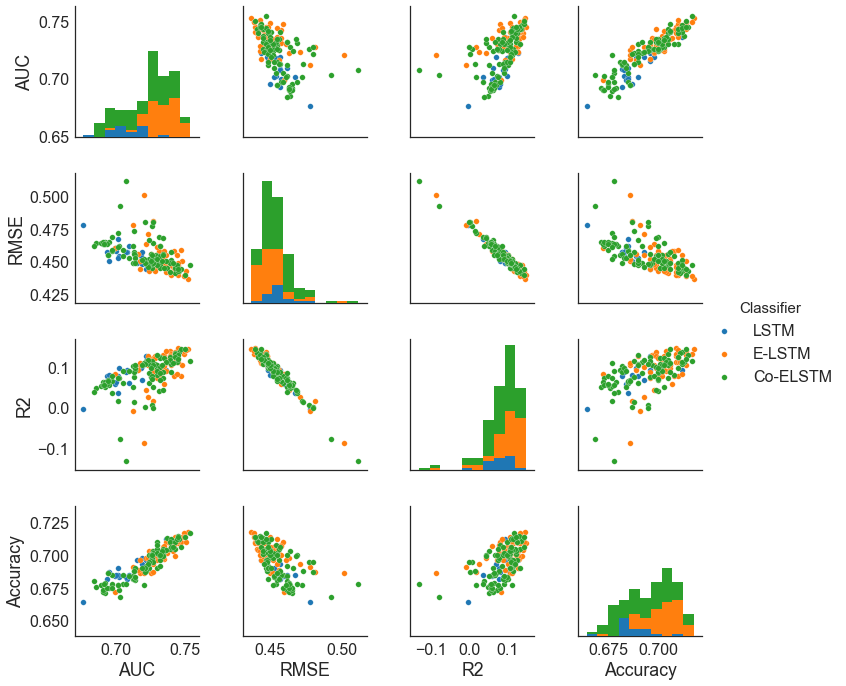

In [46]:
seaborn.pairplot(data=explorations, hue='Classifier',
                 vars=['AUC', 'RMSE', 'R2', 'Accuracy'])

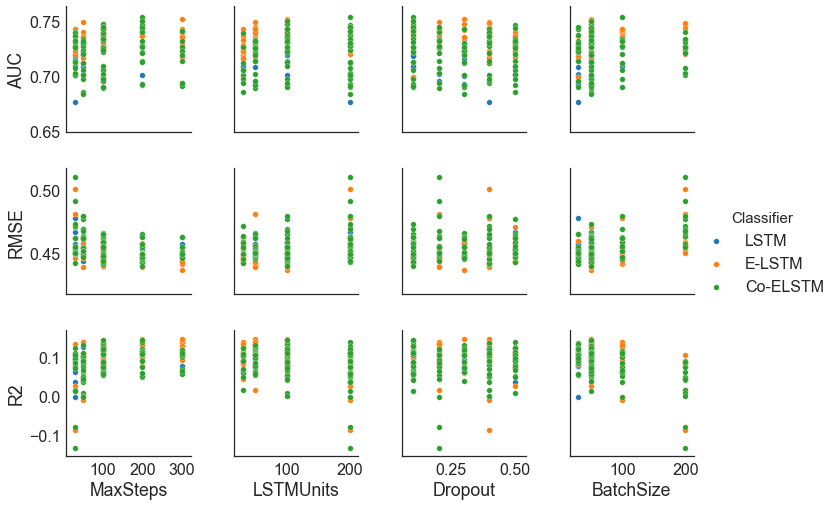

In [47]:
seaborn.pairplot(data=explorations, x_vars=['MaxSteps', 'LSTMUnits', 'Dropout', 'BatchSize'],
                 y_vars=['AUC', 'RMSE', 'R2'], hue='Classifier')

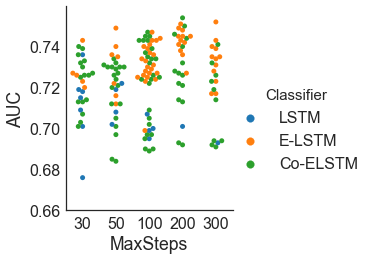

In [48]:
seaborn.factorplot(data=explorations, x='MaxSteps', y='AUC', kind='swarm', hue='Classifier')